### <a id="class_balance"><strong>Importing Libraries and Dataset</strong></a>

In [3]:
# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180 # Quality of all figures in notebook

# imports for Natural Language  Processing
import re
import os
import nltk
import string
import time
import unicodedata
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from html.parser import HTMLParser
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import emoji
from emoji import emojize
from collections import Counter
import itertools
import pickle

# Classification Models
import xgboost
from sklearn import metrics
from sklearn.svm import LinearSVC, SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

# Performance Evaluation
from sklearn.pipeline import Pipeline
from pipelinehelper import PipelineHelper
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix

# Import library for train test split
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

# Wordcloud
from PIL import Image
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


#Resampling techniques
from collections import Counter 
from sklearn.utils import resample



import warnings
warnings.filterwarnings("ignore")


# Part 1

### 

In [4]:

def clean_agreement(df: pd.DataFrame):
    '''
    This function takes in a dataframe and filters out the rows with negative label higher than positive label
    '''
    rslt_df = df.loc[df['labels_negative'] < df['labels_positive']]
    return rslt_df



def set_agreement_threshold(df: pd.DataFrame):
    '''
    This function takes in our cleaned dataframe
    and filters the rows based on a threshold for the agreement score

    We are using a threshold of 0.4
    '''
    result_df = df.loc[df['agreement'] >= 0.4]
    return result_df

def clean(text: str):
    
    """Converts apostrophe suffixes to words, replace webpage links with url, 
    annotate hashtags and mentions, remove a selection of punctuation, and convert all words to lower case.
    Args:
        df (DataFrame): dataframe containing 'text' column to convert
    Returns:
        df (DataFrame): dataframe with converted 'text' column 
    """
    lemmatizer = WordNetLemmatizer()
    def word_lemma(words, lemmatizer):
        lemma = [lemmatizer.lemmatize(word) for word in words]
        return ''.join([l for l in lemma])
    import string
    def remove_extras(post):
        punc_numbers = string.punctuation + '0123456789'
        return ''.join([l for l in post if l not in punc_numbers])
    #Lower case
    text = text.lower()
    #Removal of Punctuation
    text = remove_extras(text)
    text = word_lemma(text, lemmatizer)
    return text

# Map the target variable name to their code for better understanding
def sdglabler(df: pd.DataFrame):
    sdgLables = {1: "No poverty", 2: "Zero Hunger", 3: "Good Health and well-being", 4: "Quality Education", 5: "Gender equality", 6: "Clean water and sanitation", 7: "Affordable and clean energy", 9: "Industry, Innovation and Infrustructure", 8: "Decent work and economic growth",
                 10: "Reduced Inequality", 13: "Climate Action", 11: "Sustainable cites and communities", 12: "Responsible consumption and production", 14: "life below water", 15: "Life on land", 16: "Peace , Justice and strong institutions", 17: "Partnership for the goals"}
    df['SDG_Labels'] = df['sdg'].map(sdgLables)

### <a id="class_balance"><strong>Importing Dataset</strong></a>

In [5]:
def import_dataset(path):
    """
    Data read_csvtion, importing `csv` file only
    Args:
        path: string like `file` address in the directory
    Return:
        df: (Dataframe) output imported csv file as pandas Dataframe
    """
    train_df = pd.read_csv(path, sep='\t')
    display(train_df.head(3))
    #This line of code removes the rows where the negative label was higher than the positive label
    print("Cleaning agreement column ....")
    df = clean_agreement(train_df)
    #This line of code removes rows where the agreement score is less than 0.4
    print('Setting agreement threshold......')
    df = set_agreement_threshold(df)
    #This line of code removes rows where the agreement score is less than 0.4
    print("Preprocessing Dataset...........")
    df['clean_text'] = df['text'].apply(clean)
    sdglabler(df)
    print('Done')
    display(df.head())

    return df

In [6]:
train_df = import_dataset('osdg-community-dataset-v21-09-30.csv')

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,7,0.750000
1,10.18356/eca72908-en,00028349a7f9b2485ff344ae44ccfd6b,Labour legislation regulates maximum working h...,11,2,1,0.333333
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,6,0.714286


Cleaning agreement column ....
Setting agreement threshold......
Preprocessing Dataset...........
Done


,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,clean_text,SDG_Labels
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,7,0.750000,from a gender perspective paulgaard points out...,Gender equality
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,6,0.714286,the average figure also masks large difference...,Good Health and well-being
5,10.1787/5js4xfgl4ks0-en,000b54717f2deea5d99055b4c1c2bf5a,These findings are consistent with previous wo...,10,2,5,0.428571,these findings are consistent with previous wo...,Reduced Inequality
6,10.1787/9789264285712-7-en,000bc99895142f9b6795ddf402e16e9a,"Each section states the economic principle, re...",6,1,3,0.500000,each section states the economic principle rev...,Clean water and sanitation
7,10.1787/9789264117563-8-en,000bfb17e9f3a00d4515ab59c5c487e7,The Israel Oceanographic and Limnological Rese...,6,0,3,1.000000,the israel oceanographic and limnological rese...,Clean water and sanitation


# Part 2

In [7]:
df = train_df.copy()
df.head()

,doi,text_id,text,sdg,labels_negative,labels_positive,agreement,clean_text,SDG_Labels
0,10.6027/9789289342698-7-en,00021941702cd84171ff33962197ca1f,"From a gender perspective, Paulgaard points ou...",5,1,7,0.750000,from a gender perspective paulgaard points out...,Gender equality
2,10.1787/9789264289062-4-en,0004eb64f96e1620cd852603d9cbe4d4,The average figure also masks large difference...,3,1,6,0.714286,the average figure also masks large difference...,Good Health and well-being
5,10.1787/5js4xfgl4ks0-en,000b54717f2deea5d99055b4c1c2bf5a,These findings are consistent with previous wo...,10,2,5,0.428571,these findings are consistent with previous wo...,Reduced Inequality
6,10.1787/9789264285712-7-en,000bc99895142f9b6795ddf402e16e9a,"Each section states the economic principle, re...",6,1,3,0.500000,each section states the economic principle rev...,Clean water and sanitation
7,10.1787/9789264117563-8-en,000bfb17e9f3a00d4515ab59c5c487e7,The Israel Oceanographic and Limnological Rese...,6,0,3,1.000000,the israel oceanographic and limnological rese...,Clean water and sanitation


In [9]:
df['SDG_Labels'].value_counts(ascending= True)

Responsible consumption and production      310
Reduced Inequality                          552
Life on land                                671
life below water                            824
Industry, Innovation and Infrustructure     835
Decent work and economic growth            1021
Zero Hunger                                1177
Climate Action                             1420
No poverty                                 1481
Sustainable cites and communities          1540
Clean water and sanitation                 1626
Affordable and clean energy                1863
Good Health and well-being                 2113
Quality Education                          2729
Gender equality                            2745
Name: SDG_Labels, dtype: int64

In [16]:
def eda(df: pd.DataFrame):
    #for a better visualisation let view by the lables
    print("See distribution of messages per sdg : ")
    count = df.groupby("SDG_Labels").count()["text"].reset_index().sort_values(by="text", ascending=False)
    display(count.style.background_gradient(cmap="Purples"))
    plt.style.use('ggplot')


    num_classes = len(df["SDG_Labels"].value_counts())

    colors = 'green'

    df['SDG_Labels'].value_counts(ascending=True).plot.barh(title="Distribution of the sdg", 
                                                 ylabel="Sdg_Labels",
                                                 color=colors,
                                                 figsize=(9,9),
                                                 )

    for i, v in enumerate(df['SDG_Labels'].value_counts(ascending= True)):
        plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%", 
           color=colors, 
           va='center', 
           fontweight='bold')
    plt.show()
    # Most occurring words of the train set
    print('Wordcloud showing important keywords in the text data')
    words_train=" ".join([word for word in df['clean_text']])
    wordcloud = WordCloud(background_color='black',width=800, height=500,random_state=46).generate(words_train)

    # Displaying the word cloud image:
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

See distribution of messages per sdg : 


,SDG_Labels,text
4,Gender equality,2745
9,Quality Education,2729
5,Good Health and well-being,2113
0,Affordable and clean energy,1863
1,Clean water and sanitation,1626
12,Sustainable cites and communities,1540
8,No poverty,1481
2,Climate Action,1420
13,Zero Hunger,1177
3,Decent work and economic growth,1021


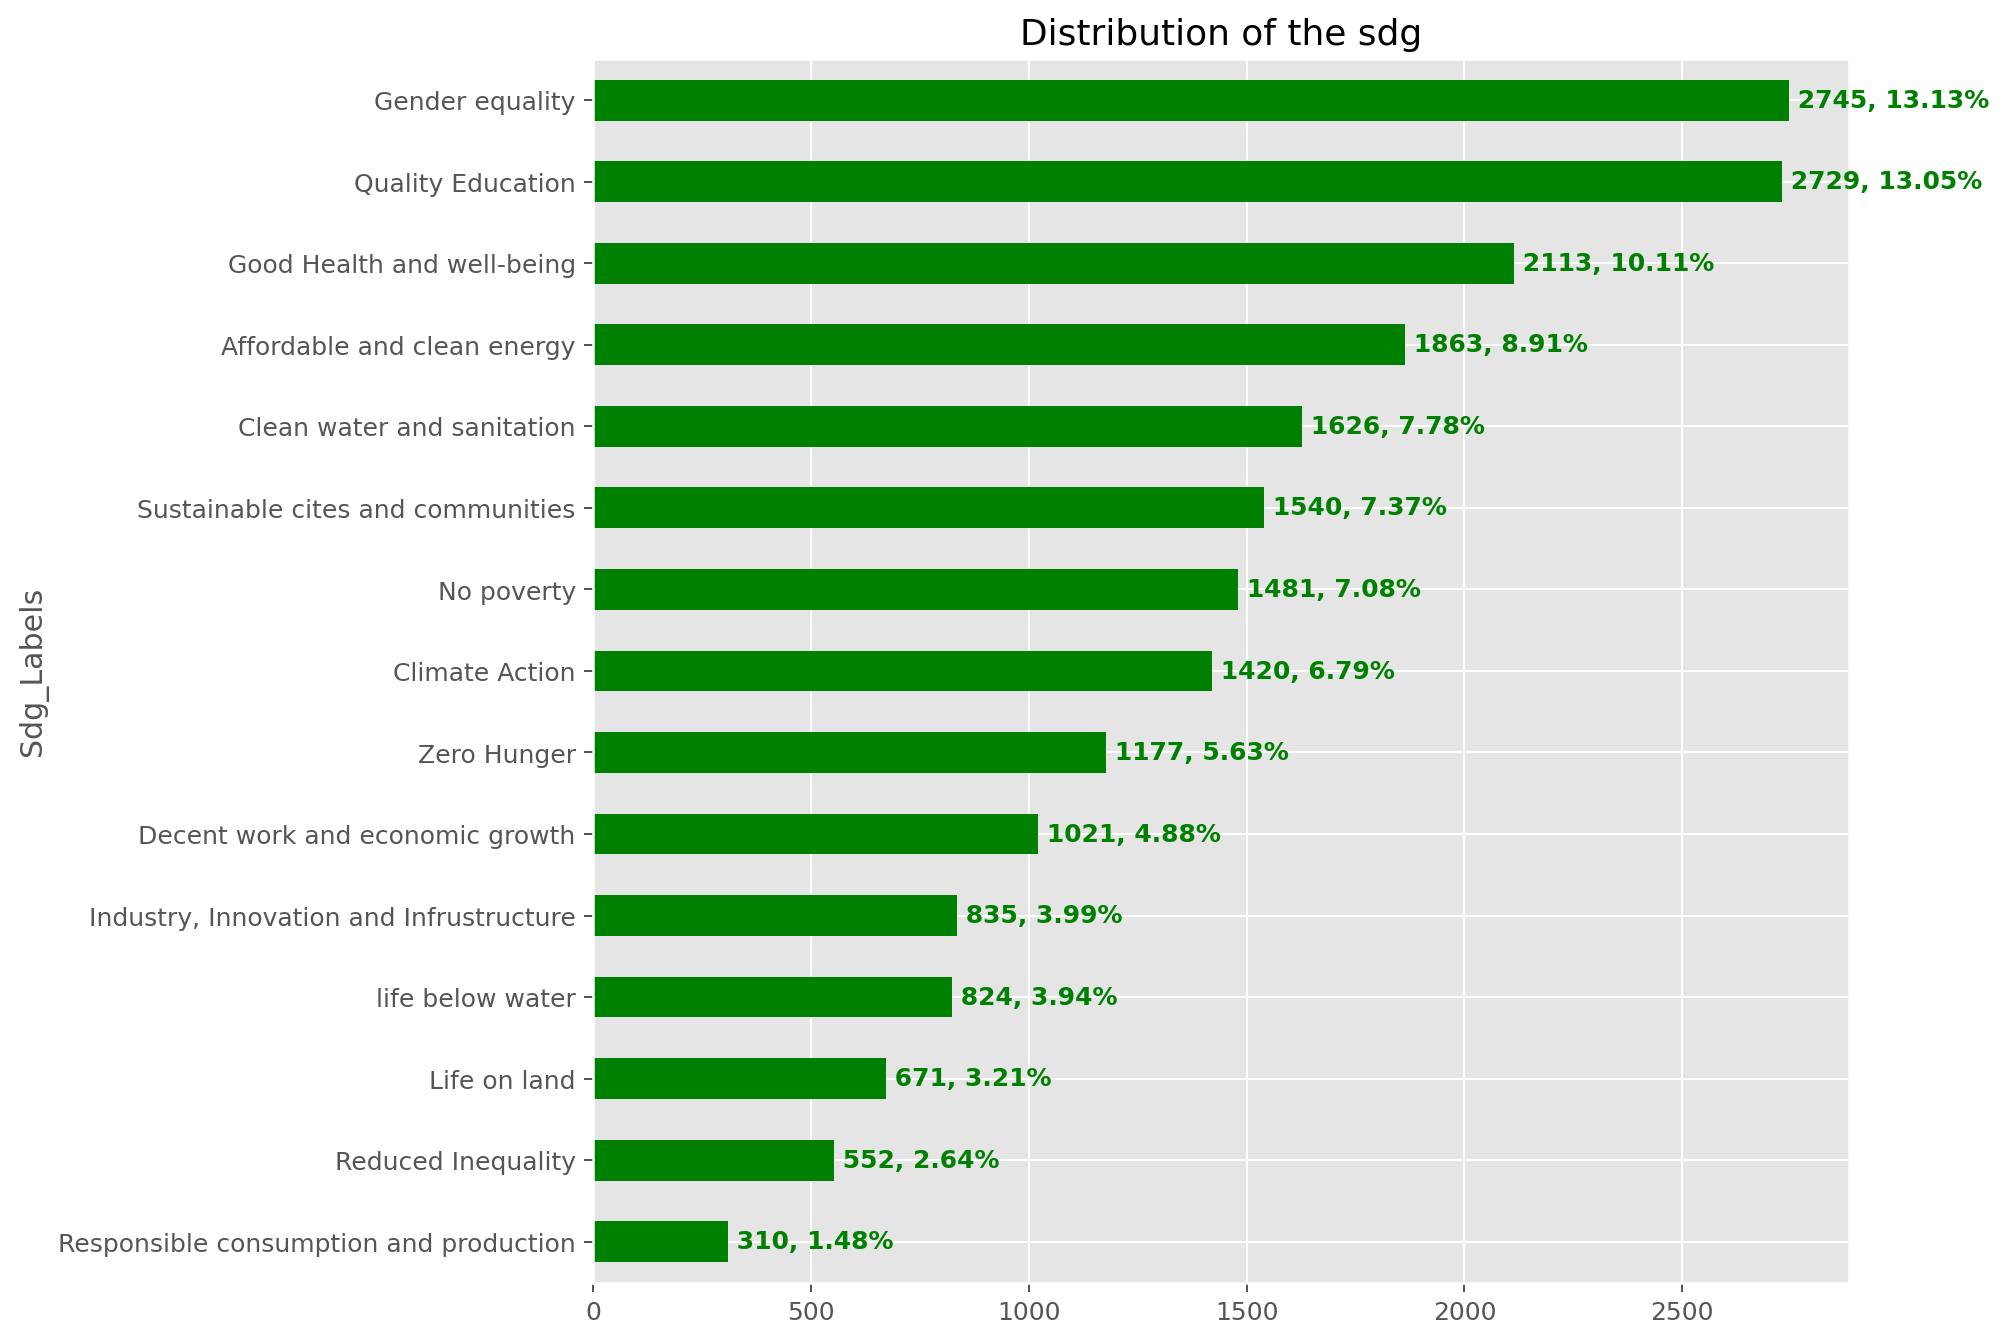

Wordcloud showing important keywords in the text data


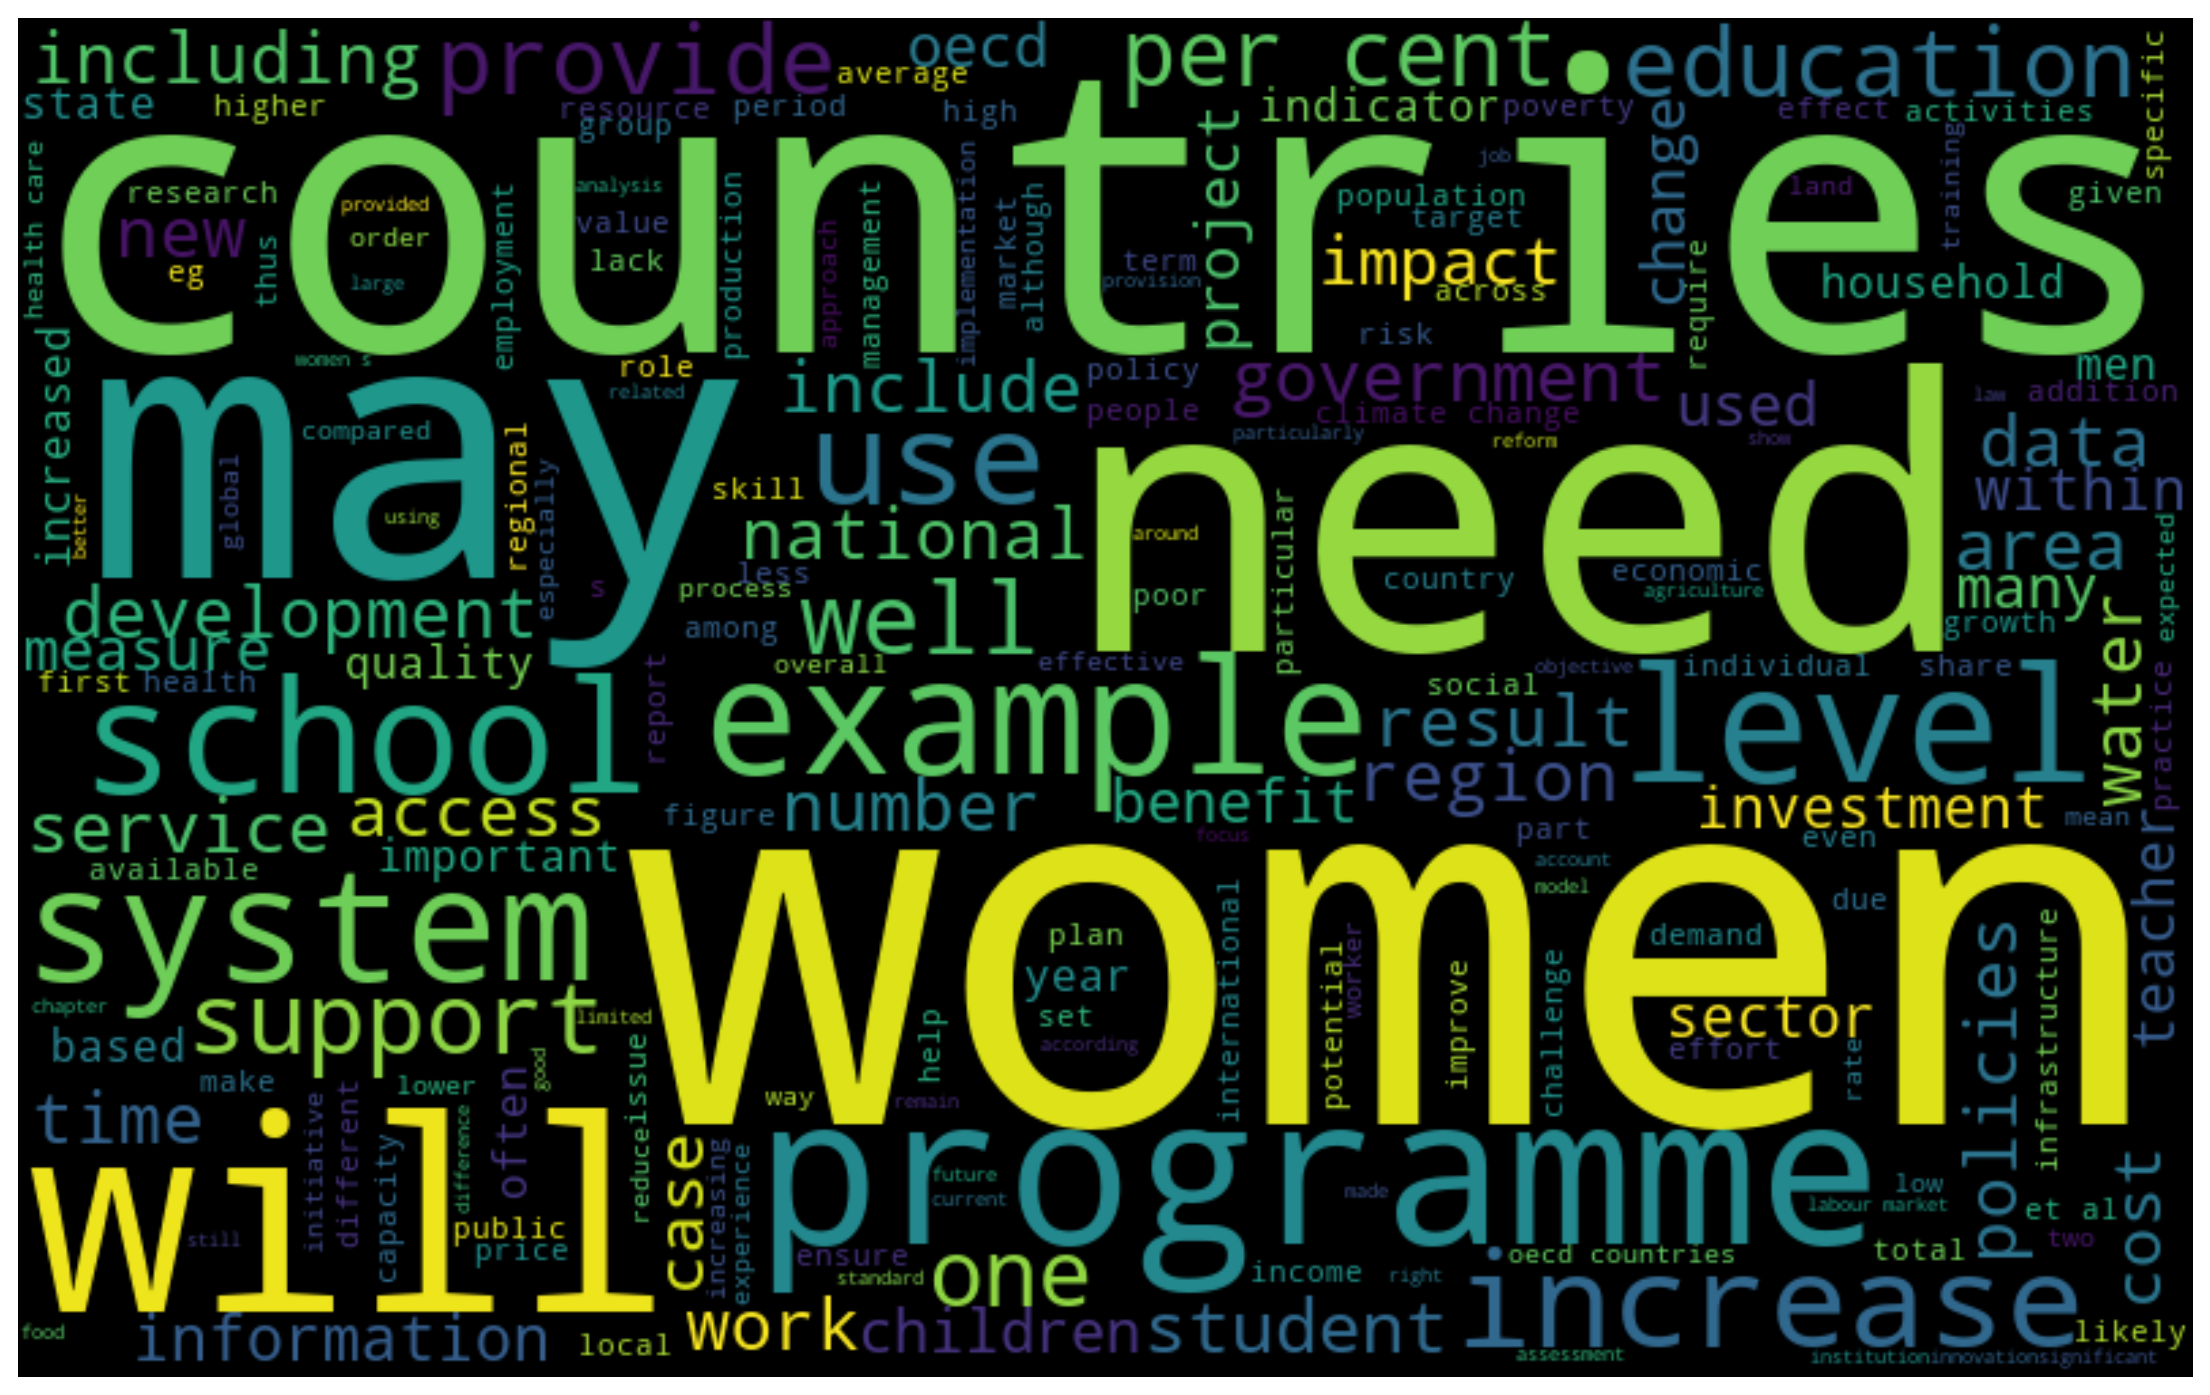

In [17]:
eda(df)

### Observations

>* It can be clearly seen that __Gender equality__ has the most text of all the SDGs. This means that more Documents have been written and published on gender equality, suggesting that Gender Equality is a pressing issue.
>* This is closely followed by Quality Education and Affordable and Clean Energy.
>* At the other end, Responsible consumption and production has the least number of text, implying that it is the least documented and researched SDG.
>. Also, Life on land, Reduced Inequality, Industry, Innovation and Infrastructure, and Life below water all have less than 1000 text. These are all important part of the SDGs but less documents have been written on them
>*  Gender equality,quality education and affordable and clean energy has the highest number of text.
>*  Responsible consumption and production has the lowest number of text.
>*  A glance look at the data gives an overview of how the text data is distributed among the various SDGs

# Part 3

## Modeling

We will be making use of a pipeline to build our classification models. This pipeline will vectorize the text data before fitting it to our chosen model.

The following models will be considered:

- Random forest
- Naive Bayes
- K nearest neighbors
- Logistic regression
- Support vector machine (SVM OR SVC)
- Linear SVC
- Xgboost
- SGD Classifier
- Adaboost
- Decision tree


### <a id="class_balance"><strong>Working with balanced data</strong></a>

In [10]:
# Creating a funtion to balance the dataset
def data_balancing(df_input: pd.DataFrame, scaling: str="UpScaling"):
    """
        Dataset balancing for all target variable to be equal in frequency.
    Args:
        `df` (DataFrame): pd.Series containing the target variable
        `scaling`('DownScaling', 'UpScaling', 'BalanceScaling'); by default it will be `UpScale` 
        Data balancing will be done base on the assign instruction.   
    Return:
        df (DataFrame): dataframe with resample and balance dataset asper instruction on `scaling`
    """
    df = df_input.copy()
    if scaling == 'DownScaling':
        class_size = int(df.sdg.value_counts().min()) # setting the minimum size for each category in 'sdg'
    elif scaling == 'BalanceScaling':
        class_size = int(df.sdg.value_counts().mean()) # setting an average value for each category in 'sdg'
    else:
        class_size = int(df.sdg.value_counts().max()) # setting the maximum size for each category in 'sdg'

    target_size = df.sdg.value_counts() # getting category name and their size
    appended_target = [] # creating an empty list to append all category after resampling

    # Creating a for-loop to resample and append to a list
    for index, size in target_size.items():
        if size < class_size: # setting condition to check if to downsample or upsample
            temp_pd = resample(df[df['sdg']==index],
                              replace=True, # sample with replacement
                              n_samples=class_size, # match number in majority class
                              random_state=27)
        else:
            temp_pd = resample(df[df['sdg']==index],
                              replace=False, # sample with replacement (no need to duplicate observations)
                              n_samples=class_size, # match number in minority class
                              random_state=27)
    # Appending each category after resampling
        appended_target.append(temp_pd)
        
    # Creating a new dataframe and viewing
    df_resampled = pd.concat(appended_target, axis=0)
    # Class with there new resampled sizes
    target_new_size = df_resampled.sdg.value_counts()
    
    # ploting the old and new graph frequency
    ax = target_size.plot(kind='bar')
    target_new_size.plot(kind='bar', title='Count (target)', 
                         ax=ax,color='orange', alpha=0.5);
    plt.xticks(range(len(target_size)), target_size.index)
    plt.ylabel("# of observations")
    plt.legend(['original','resampled'])
    plt.show()
    return df_resampled

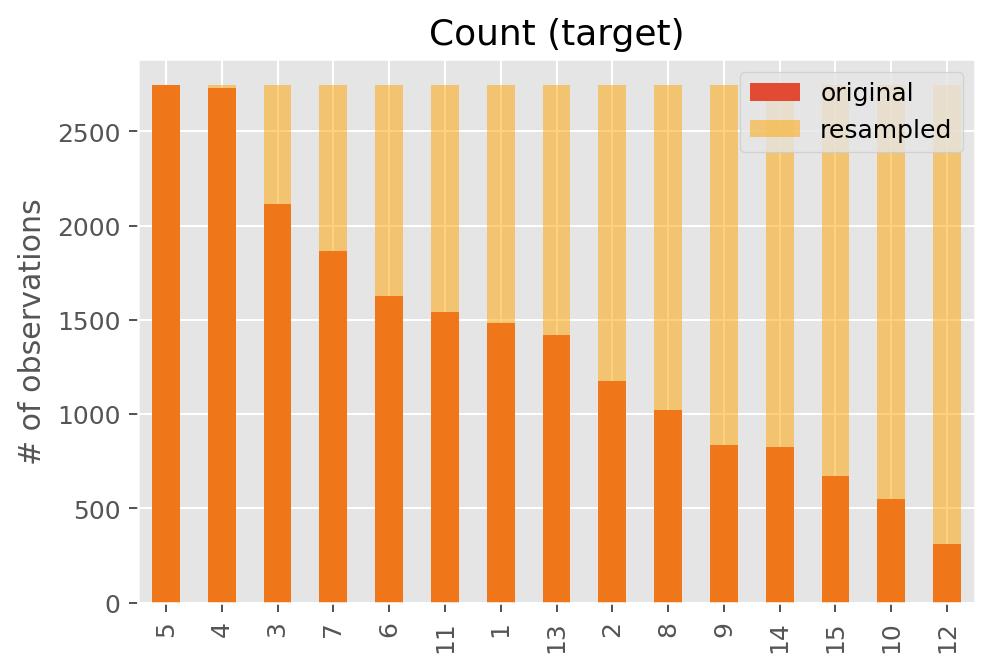

In [12]:
df_train_resample = data_balancing(df)


### <a id="class_balance"><strong>Train - Validation split</strong></a>

Before we pass our data through our custom pipelines we have to split our train data into features and target variables. After this step we can split our train data into a train and validation set. This will allow us to evaluate our model performance and chose the best model to use for our submission

In [14]:
def train_test(df: pd.DataFrame):
    """
    Args: df (DataFrame) including the predictor (X) and the target (y)
    Return: Split data to target (y) and features (X)
    """
    X = df['clean_text']
    y = (np.array(df['sdg']))
    
    # Here we split data to training and testing parts
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return (X_train, X_test, y_train, y_test)

In [15]:
# spliting data to training and testing parts
X_train, X_test, y_train, y_test = train_test(df_train_resample)

### Pipelines

Pipelines consist of 2 steps, vectorization and model fitting.

Machines, unlike humans, cannot understand the raw text. Machines can only see numbers. Particularly, statistical techniques such as machine learning can only deal with numbers. Therefore, we need to convert our text into numbers.

The TFIDF or Count vectorizer assigns word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The TfidfVectorizer will tokenize documents, learn the vocabulary and inverse document frequency weightings, and allow you to encode new documents. Another advantage of this method is that the resulting vectors are already scaled.

In [16]:
def model(models, X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame) -> pd.DataFrame:
    '''
    Lightweight script to test many models
    Args:
    :param X_train: training split
    :param y_train: training target vector
    :param X_test: test split
    :param y_test: test target vector
    Returns:
        DataFrame of predictions
    '''
    
    dfs = []
    results = []
    names = []
    target_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']

    for name, model in models:
        kfold = KFold(n_splits=5, shuffle=True) # splitting the data into kfolds
        cv_results = cross_validate(model, X_train, y_train, cv=kfold)
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred, target_names=target_names))
        print('F1_SCORE:', f1_score(y_test, y_pred, average= 'weighted'))
        cm = confusion_matrix(y_test, y_pred)
        cm_train = pd.DataFrame(cm, index = target_names, columns = target_names)
        # plotting the confusion matrix using heatmap
        print('Confusion Matrix')
        plt.figure(figsize=(10,5))
        sns.heatmap(cm_train, annot=True)
        plt.title('Confusion Matrix')
        plt.ylabel('Actal Values')
        plt.xlabel('Predicted Values')
        plt.show()
    
        results.append(cv_results)
        names.append(name)
        this_df = pd.DataFrame(cv_results)
        this_df['model'] = name
        dfs.append(this_df)
    final = pd.concat(dfs, ignore_index=True)
    return final

In [17]:
def pipe():
    #Logistic Regression
    lr = Pipeline([('tfidf', TfidfVectorizer(min_df=2, ngram_range=(1, 2), stop_words='english')),
               ('clf', LogisticRegression(random_state=3, 
                                          multi_class='ovr',
                                         solver = 'liblinear'))])

    #Multinomial Naive Bayes
    multi = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                            smooth_idf = True, 
                                            max_df = 0.3,
                                            ngram_range = (1, 2),
                                            stop_words='english')),
                  ('clf', MultinomialNB())])
    
    
    

    
    #Linear SVC
    linsvc = Pipeline([('tfidf', TfidfVectorizer(sublinear_tf=True, 
                                             smooth_idf = True, 
                                             max_df = 0.3,
                                             ngram_range = (1, 2),
                                             stop_words='english')),
                   ('clf', LinearSVC())])
    # collection of all the models
    model_tuned = [
        ('LogReg', lr),
        ('MULT', multi),
        ('LINSVM', linsvc)
        ]
    return model_tuned

In [19]:
# collection of all the models
model_tuned = pipe()

LogReg
              precision    recall  f1-score   support

           1       0.93      0.88      0.90       543
           2       0.94      0.94      0.94       526
           3       0.94      0.95      0.95       574
           4       0.95      0.96      0.96       555
           5       0.92      0.92      0.92       577
           6       0.95      0.95      0.95       540
           7       0.94      0.94      0.94       534
           8       0.90      0.91      0.91       534
           9       0.90      0.94      0.92       527
          10       0.94      0.93      0.94       548
          11       0.92      0.92      0.92       555
          12       0.96      0.99      0.97       552
          13       0.94      0.91      0.92       558
          14       0.98      0.98      0.98       589
          15       0.97      0.97      0.97       523

    accuracy                           0.94      8235
   macro avg       0.94      0.94      0.94      8235
weighted avg       

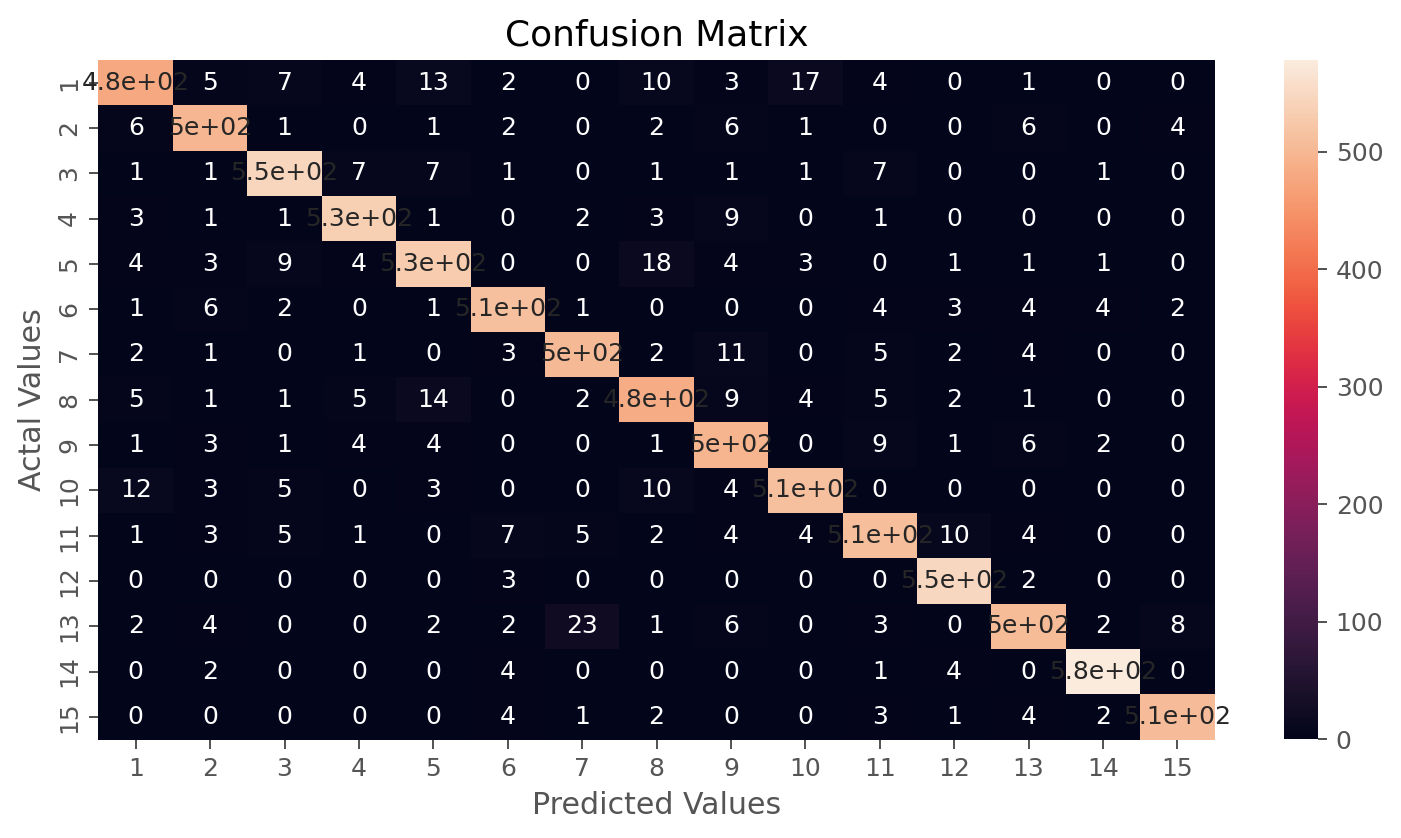

MULT
              precision    recall  f1-score   support

           1       0.94      0.92      0.93       543
           2       0.97      0.95      0.96       526
           3       0.97      0.95      0.96       574
           4       0.97      0.95      0.96       555
           5       0.96      0.86      0.91       577
           6       0.98      0.97      0.97       540
           7       0.96      0.95      0.96       534
           8       0.91      0.92      0.91       534
           9       0.92      0.98      0.95       527
          10       0.92      0.98      0.95       548
          11       0.95      0.95      0.95       555
          12       0.97      1.00      0.98       552
          13       0.92      0.94      0.93       558
          14       0.99      0.99      0.99       589
          15       0.97      0.99      0.98       523

    accuracy                           0.95      8235
   macro avg       0.95      0.95      0.95      8235
weighted avg       0.

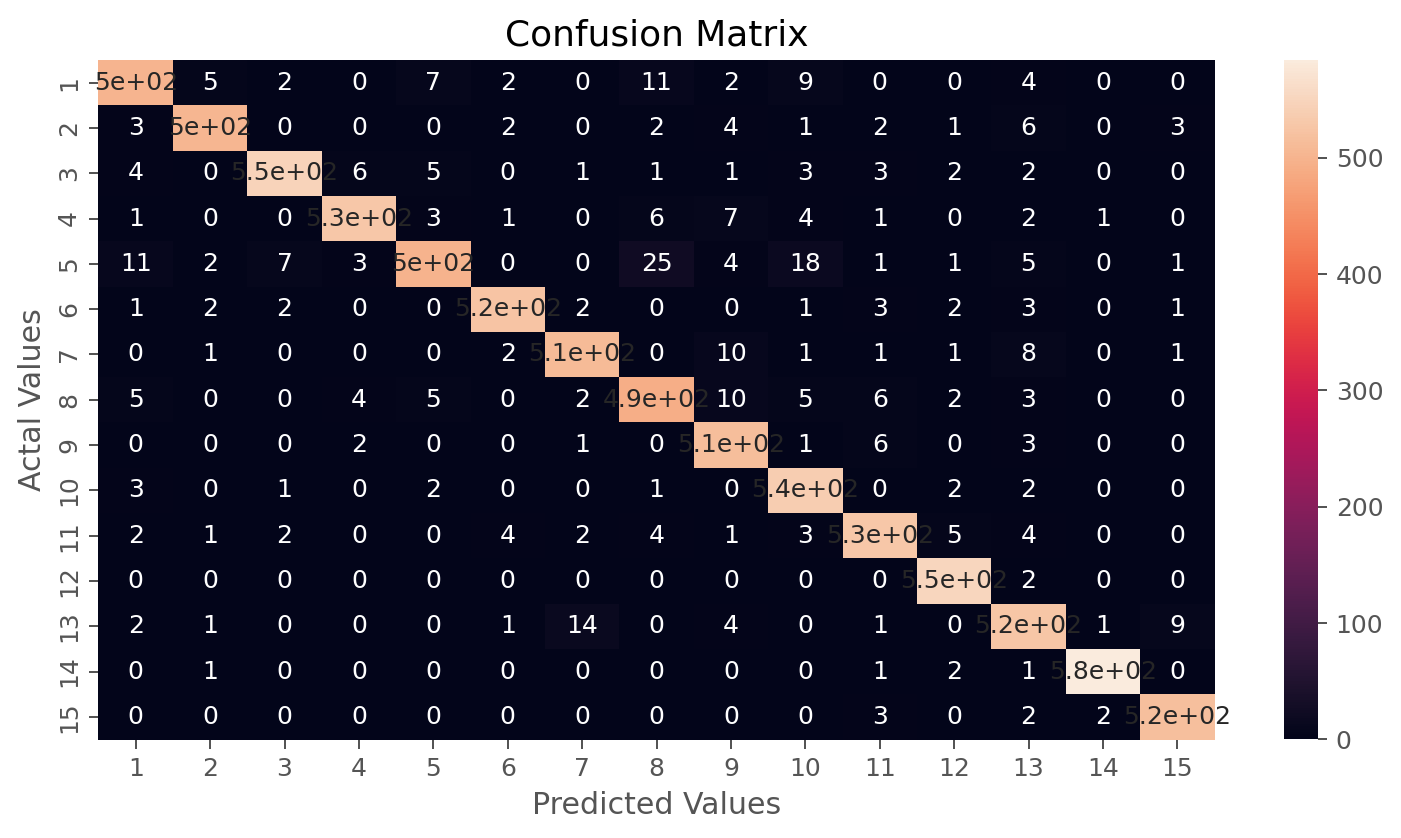

LINSVM
              precision    recall  f1-score   support

           1       0.98      0.95      0.96       543
           2       0.98      0.98      0.98       526
           3       0.98      0.96      0.97       574
           4       0.98      0.99      0.98       555
           5       0.95      0.95      0.95       577
           6       0.99      0.99      0.99       540
           7       0.97      0.97      0.97       534
           8       0.94      0.96      0.95       534
           9       0.96      0.98      0.97       527
          10       0.98      0.98      0.98       548
          11       0.96      0.97      0.97       555
          12       0.99      1.00      0.99       552
          13       0.98      0.95      0.96       558
          14       0.99      0.99      0.99       589
          15       0.98      0.99      0.98       523

    accuracy                           0.97      8235
   macro avg       0.97      0.97      0.97      8235
weighted avg       

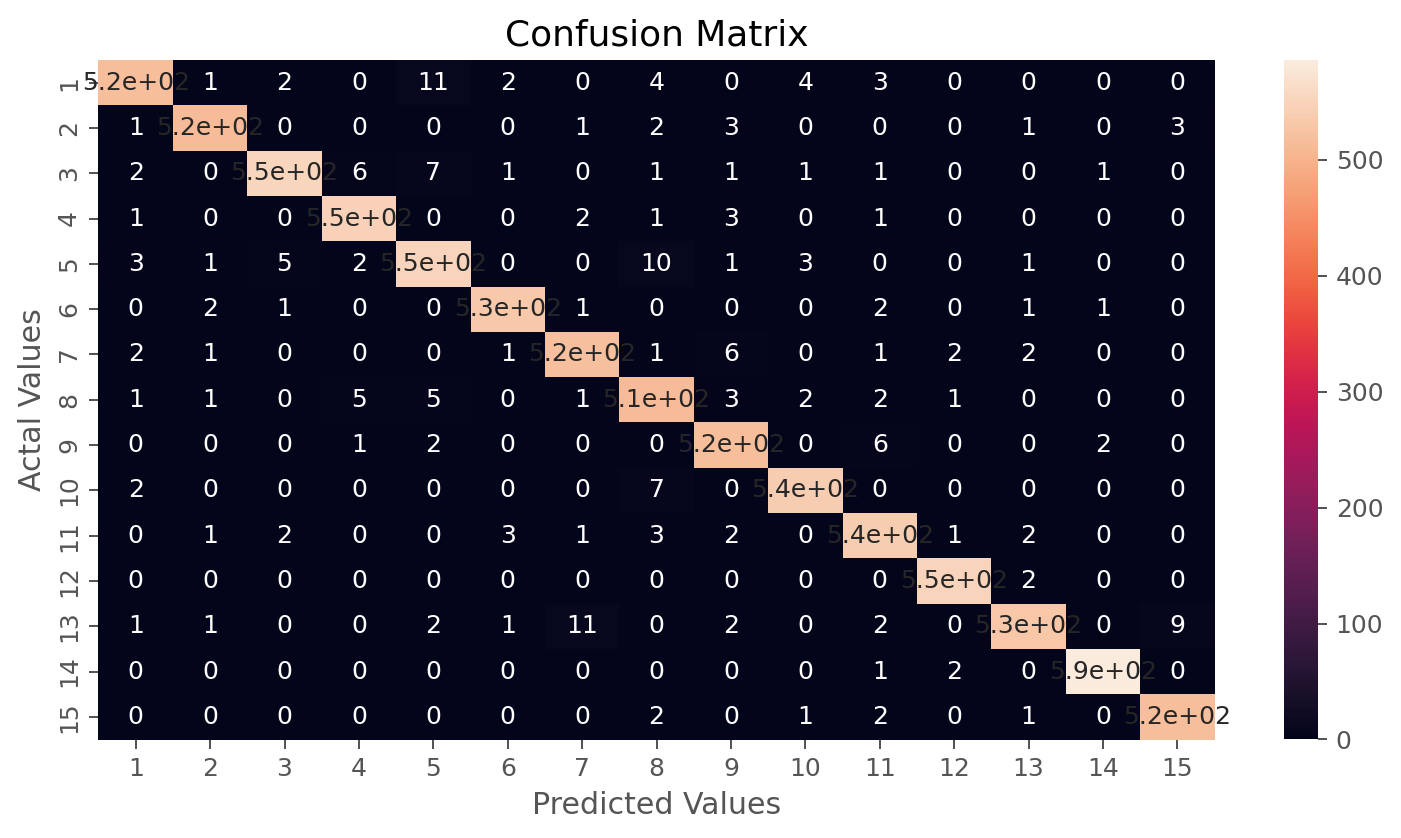

In [20]:
tuned = model(model_tuned, X_train, y_train, X_test, y_test)

## 12. Model Performance

To wrap up our analysis, we are going to analyze the data in the final dataframe returned from the model() script.

To obtain better estimates of the distribution of metrics from each model before and after hyper-parameter tuning, we ran an empirical bootstrapping at 30 samples. Additionally, we partitioned the data into two sorts: performance metrics and fit-time metrics. The following block of code achieves this.

In [22]:
def mod_perf(modelled):
    '''
    This script was constructed to avoid repetitive codes for performance analysis.
    Args:
        params modelled: results after using the model() script
    Returns : 
        a tuple containing the test score, fit time, and score time of each model
    
    '''
    bootstraps = []
    for model in list(set(modelled.model.values)):
        model_df = modelled.loc[modelled.model == model]
        bootstrap = model_df.sample(n=30, replace=True)
        bootstraps.append(bootstrap)
        
    bootstrap_df = pd.concat(bootstraps, ignore_index=True)
    results_long = pd.melt(bootstrap_df,id_vars=['model'],var_name='metrics', value_name='values')
    time_metrics = ['fit_time','score_time'] # fit time metrics
    ## PERFORMANCE METRICS
    results_long_nofit = results_long.loc[~results_long['metrics'].isin(time_metrics)] # get df without fit data
    results_long_nofit = results_long_nofit.sort_values(by='values')
    ## TIME METRICS
    results_long_fit = results_long.loc[results_long['metrics'].isin(time_metrics)] # df with fit data
    results_long_fit = results_long_fit.sort_values(by='values')
    return (results_long_nofit,results_long_fit)

In [23]:
def test_score():
    plt.figure(figsize=(20, 12))
    sns.set(font_scale=2.5)
    g = sns.boxplot(x="model", y="values", hue="metrics", data=mod_perf(tuned)[0], palette="Set3")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Comparison of Model by Classification Metric')
    plt.savefig('./benchmark_models_performance.png',dpi=300)
    plt.show()

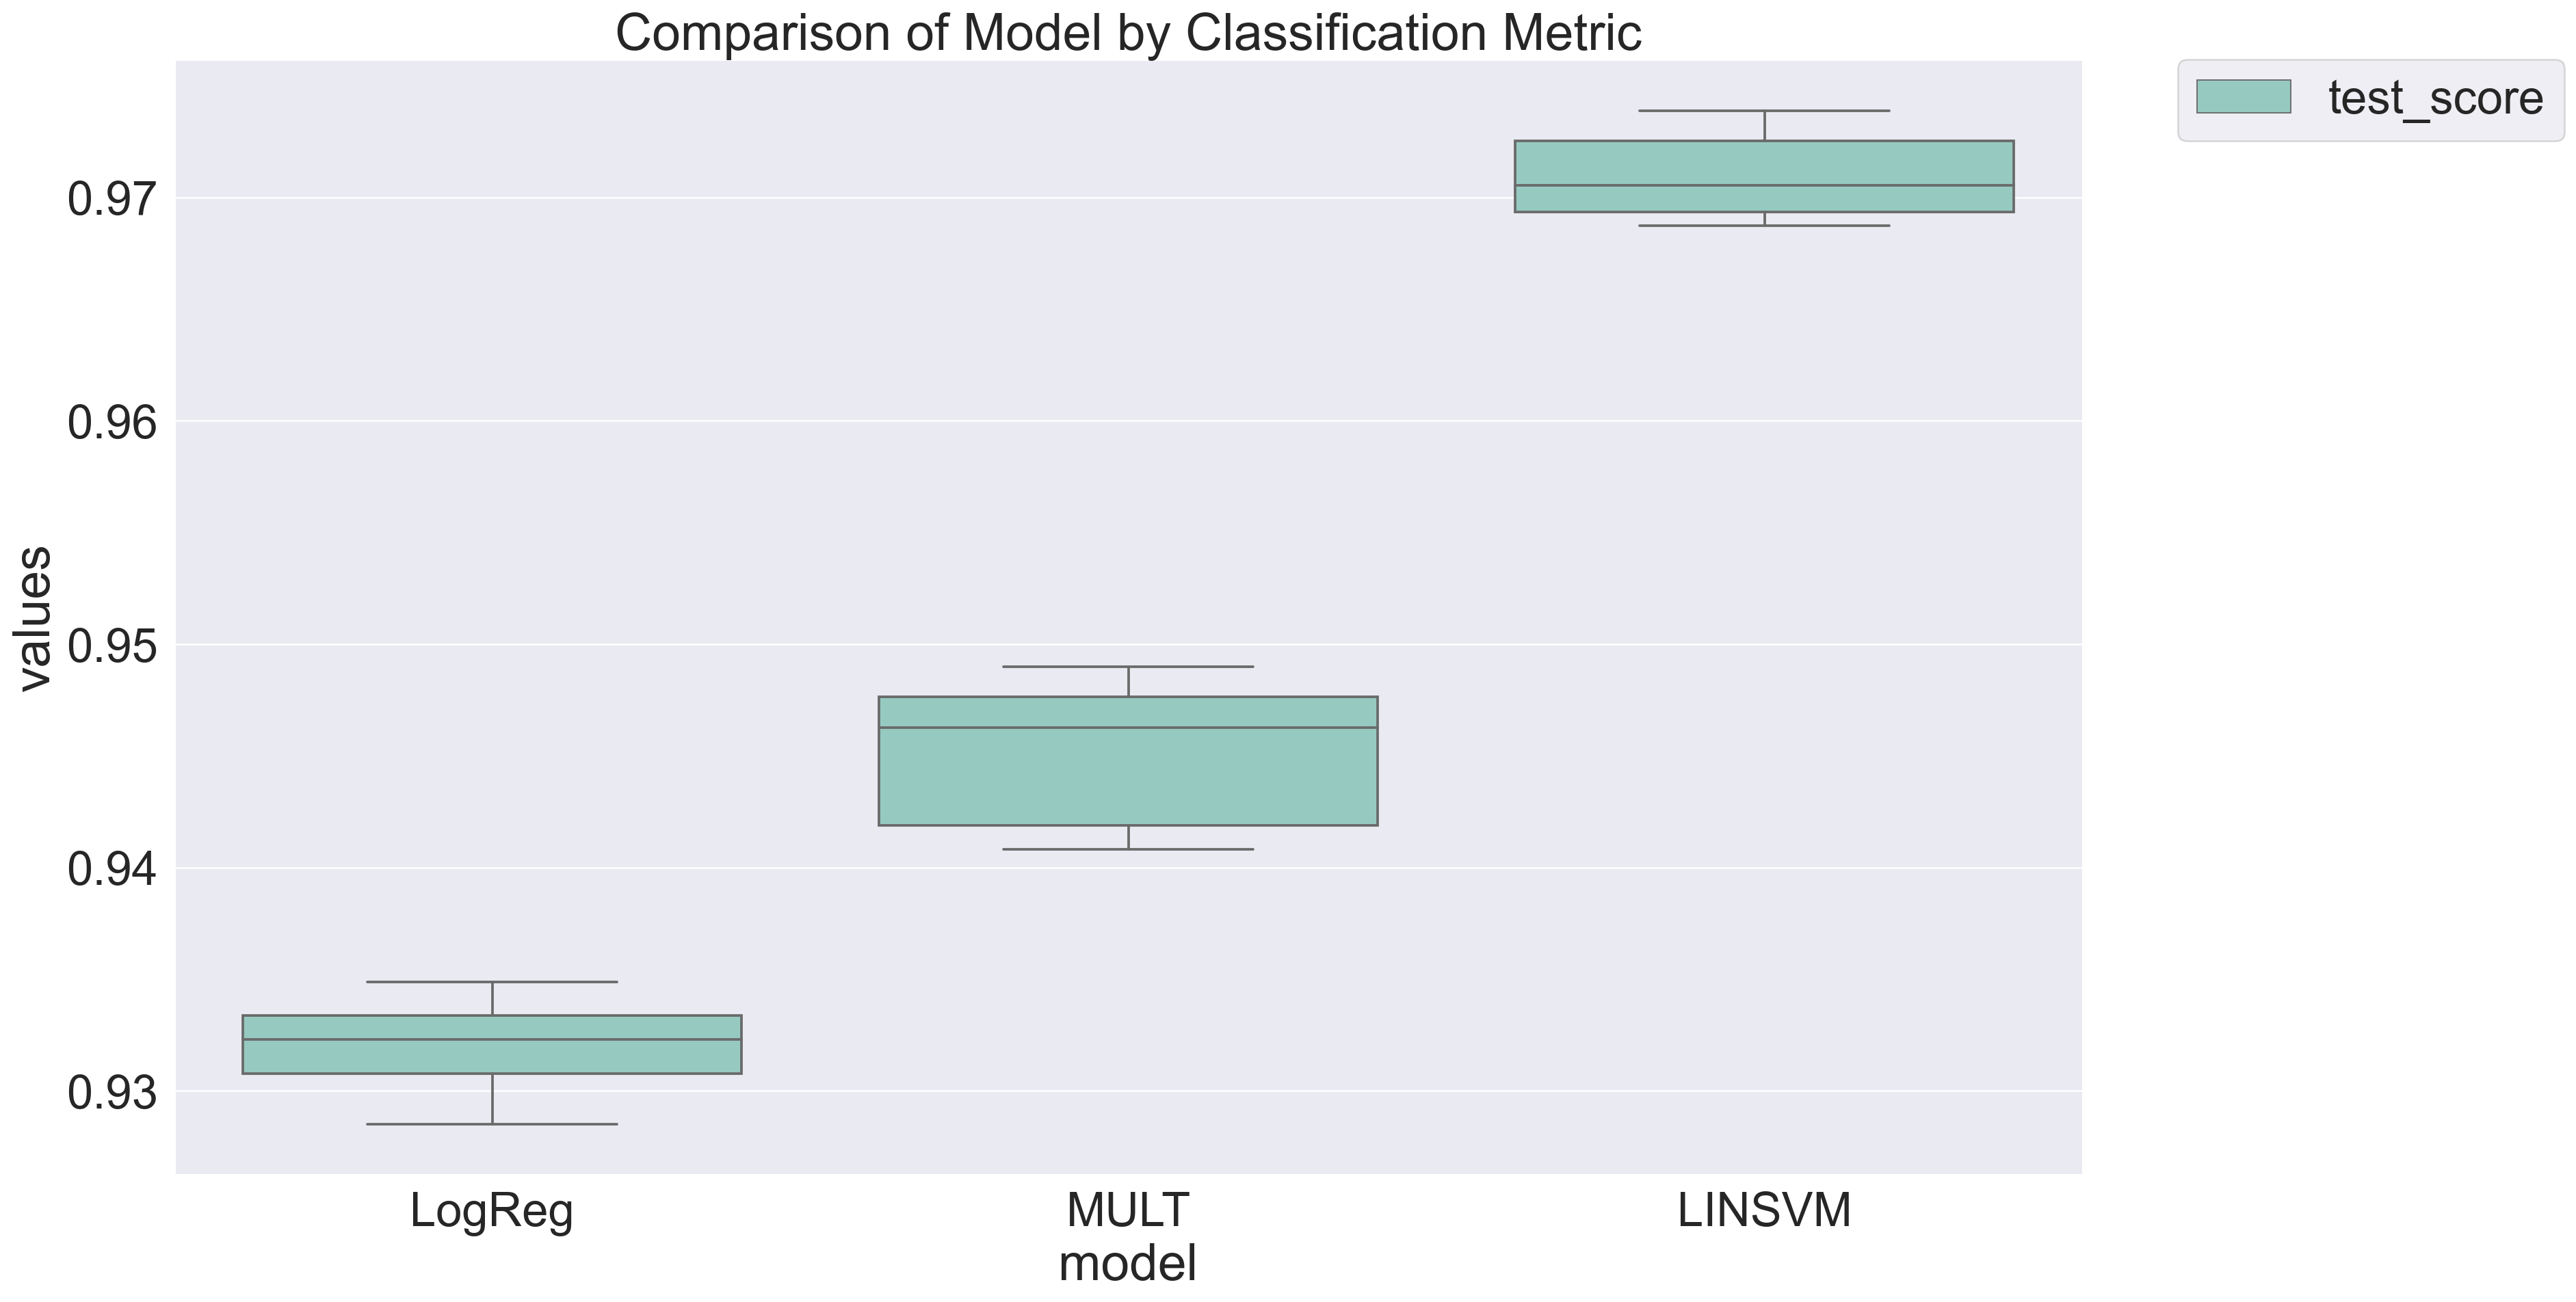

In [24]:
test_score()

In [26]:
def fit_time():
    plt.figure(figsize=(20, 12))
    sns.set(font_scale=2.5)
    g = sns.boxplot(x="model", y="values", hue="metrics", data=mod_perf(tuned)[1], palette="Set3")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title('Comparison of Model by Fit and Score Time')
    plt.savefig('./benchmark_models_time.png',dpi=300)
    plt.show()

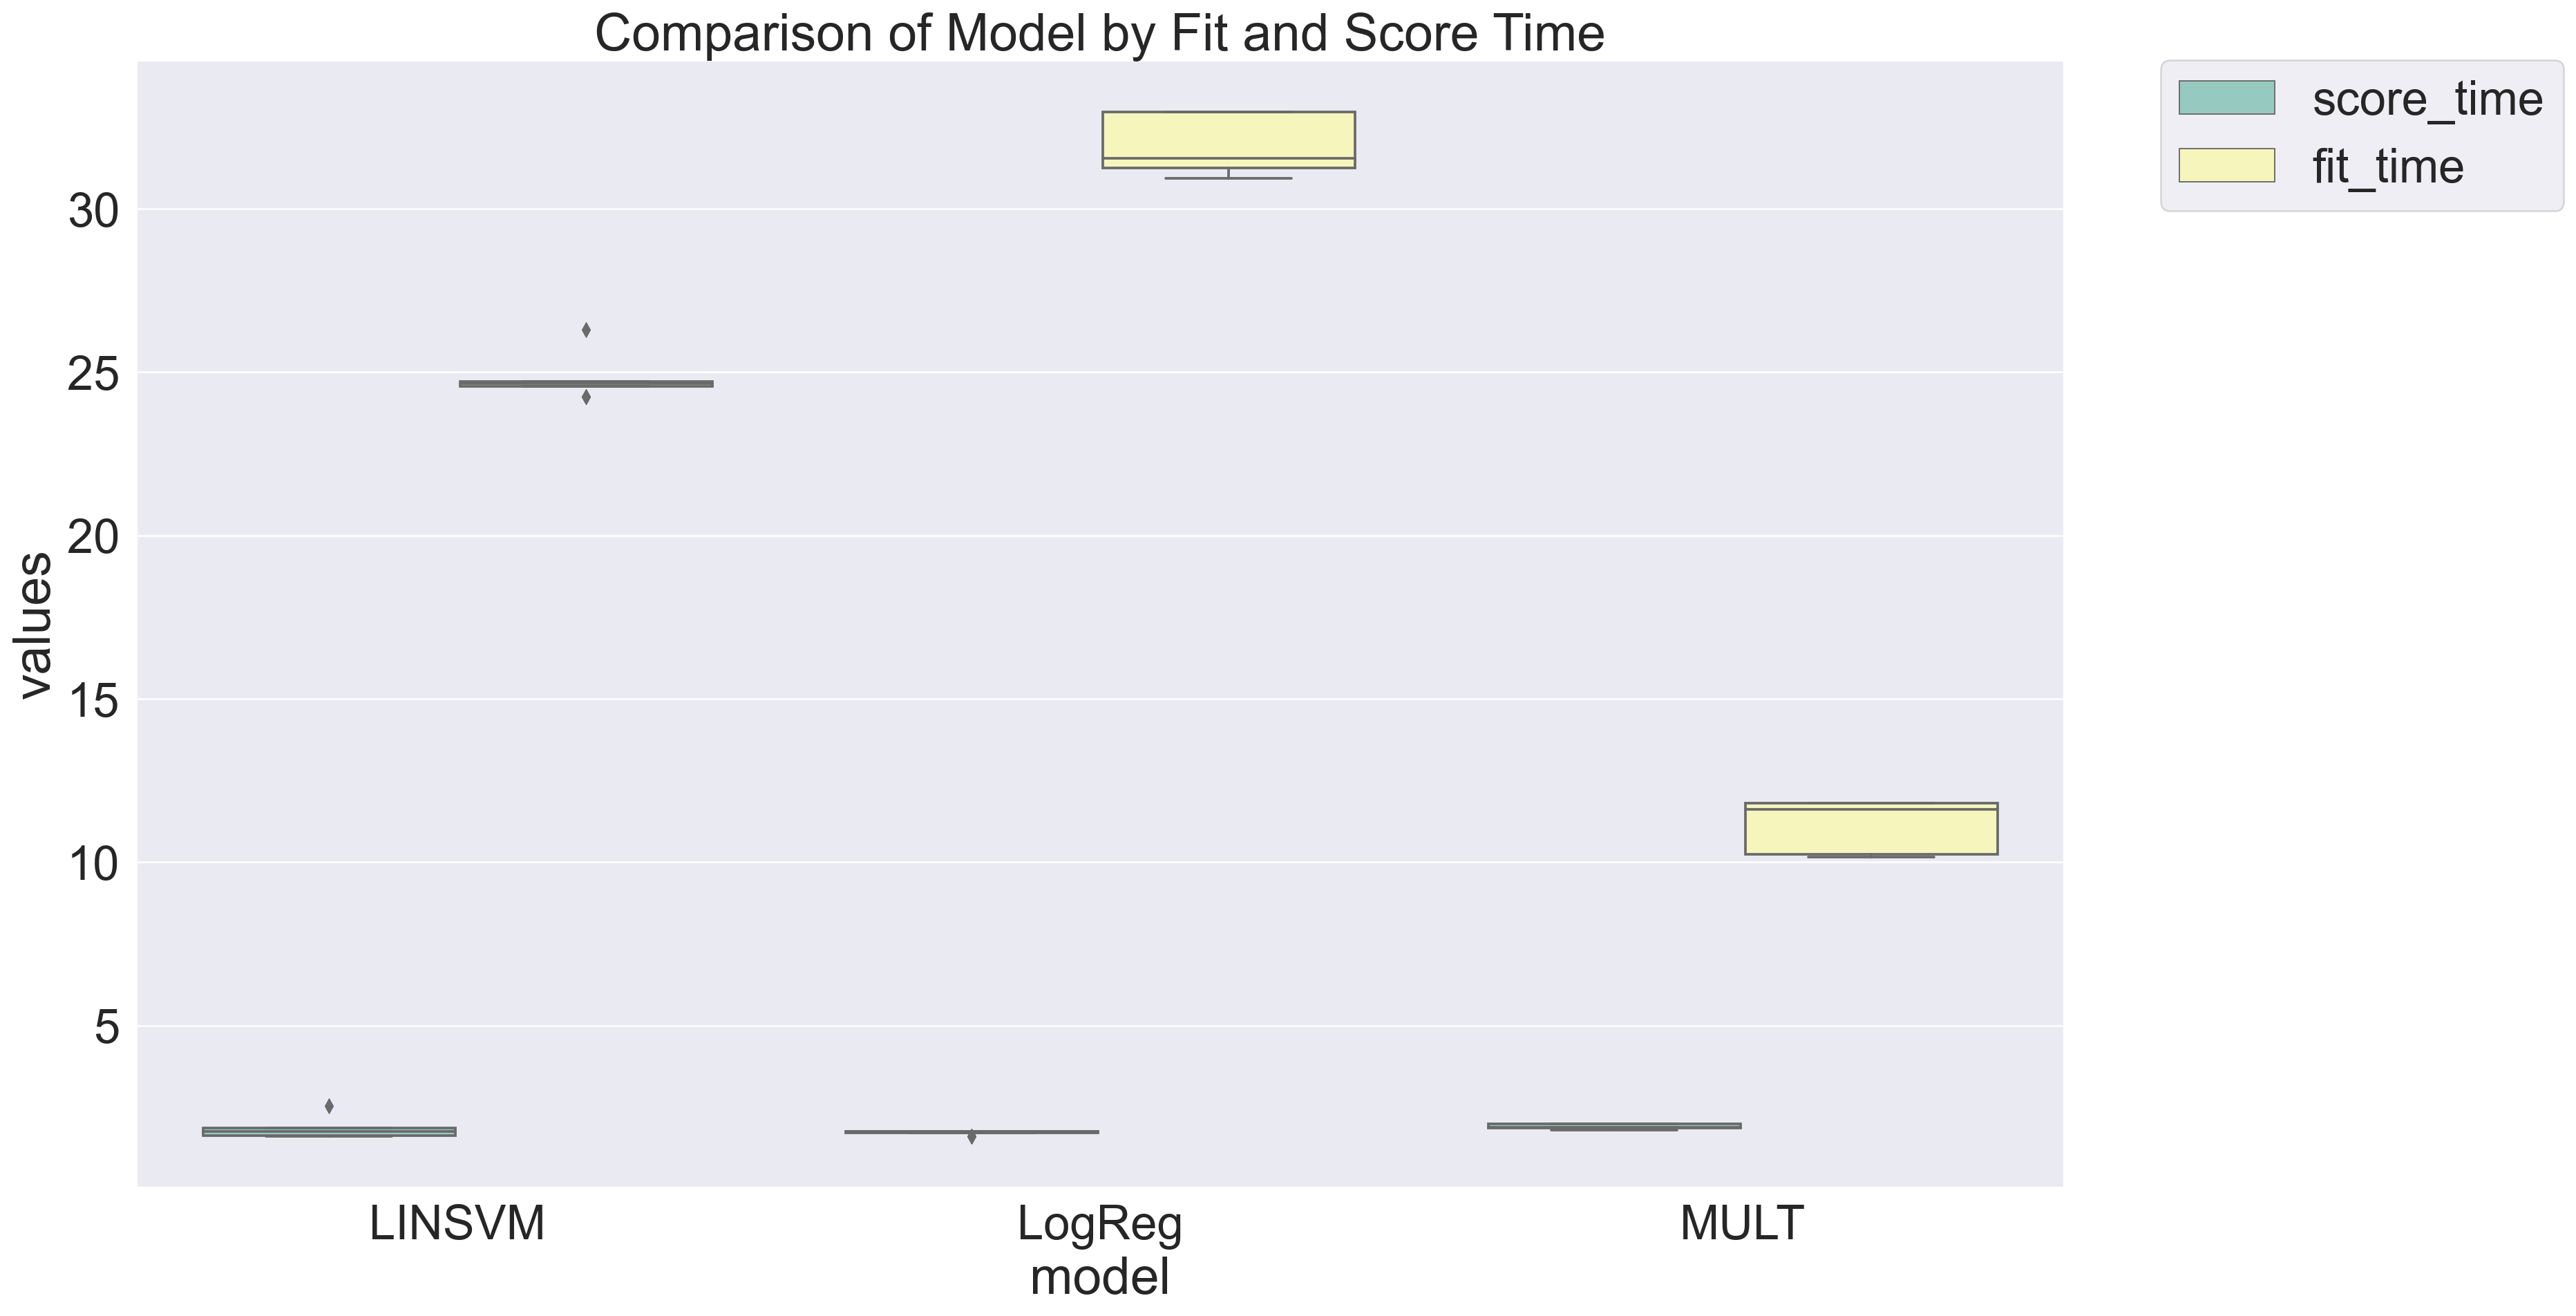

In [27]:
fit_time()